# Data Analysis of Olympic Games (1896-2022)

The Olympic Games are one of the most prestigious sporting events in the world. They have been held every four years since 1896, with the exception of World War I and World War II. The Games have seen some of the greatest athletes in history compete in a wide variety of sports.

The goal of this project is to research the history of the Olympic Games and find interesting statistics. The project aims to answer questions such as: 

- Which years,cities and countries the Olympics were held in ?

- Which country has won the most medals? 

- Which sport has the highest number of medals awarded? 

- What are the trends in medal count over time? 

- How has the participation of women in the Olympic Games changed over time?

- Do host countries generally win more medals in the Olympics?

and more

The GitHub repo for the project is available at https://github.com/gururaser/data-analysis-of-olympic-games.

## Imports

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

## Which years,cities and countries the Olympics were held in ?
The Olympic Games have been held in various cities throughout different years. Let's explore which cities and years have hosted this prestigious event.

In [123]:
places = pd.read_csv('olympic_historical_dataset/Olympics_Games.csv')

In [124]:
places.head()

,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld
0,1896 Summer Olympics,1,/editions/1,1896,Athina,/images/flags/GRE.png,GRE,6 April,15 April,6 – 13 April,NaN
1,1900 Summer Olympics,2,/editions/2,1900,Paris,/images/flags/FRA.png,FRA,NaN,NaN,14 May – 28 October,NaN
2,1904 Summer Olympics,3,/editions/3,1904,St. Louis,/images/flags/USA.png,USA,14 May,NaN,1 July – 26 November,NaN
3,1908 Summer Olympics,5,/editions/5,1908,London,/images/flags/GBR.png,GBR,13 July,NaN,27 April – 31 October,NaN
4,1912 Summer Olympics,6,/editions/6,1912,Stockholm,/images/flags/SWE.png,SWE,6 July,27 July,5 May – 27 July,NaN


Unfortunately, the following Olympic games could not be held due to the first and second world wars.

In [125]:
places.query('isHeld == "Not held due to war"')[['edition','city','country_noc','isHeld']]

,edition,city,country_noc,isHeld
5,1916 Summer Olympics,Berlin,GER,Not held due to war
11,1940 Summer Olympics,Helsinki,FIN,Not held due to war
12,1944 Summer Olympics,London,GBR,Not held due to war
39,1940 Winter Olympics,Garmisch-Partenkirchen,GER,Not held due to war
40,1944 Winter Olympics,Cortina d'Ampezzo,ITA,Not held due to war


### Discarding some unnecessary columns

In [126]:
places_w_nec_cols = places[['edition','year','city','country_noc','competition_date']]

In [127]:
places_w_nec_cols

,edition,year,city,country_noc,competition_date
0,1896 Summer Olympics,1896,Athina,GRE,6 – 13 April
1,1900 Summer Olympics,1900,Paris,FRA,14 May – 28 October
2,1904 Summer Olympics,1904,St. Louis,USA,1 July – 26 November
3,1908 Summer Olympics,1908,London,GBR,27 April – 31 October
4,1912 Summer Olympics,1912,Stockholm,SWE,5 May – 27 July
...,...,...,...,...,...
59,2018 Winter Olympics,2018,PyeongChang,KOR,8 – 25 February
60,2022 Winter Olympics,2022,Beijing,CHN,2 – 20 February
61,2026 Winter Olympics,2026,Milano-Cortina d'Ampezzo,ITA,4 – 22 February
62,1956 Equestrian,1956,Stockholm,SWE,11 – 17 June


In [128]:
places_w_nec_cols['edition'].unique()

array(['1896 Summer Olympics', '1900 Summer Olympics',
       '1904 Summer Olympics', '1908 Summer Olympics',
       '1912 Summer Olympics', '1916 Summer Olympics',
       '1920 Summer Olympics', '1924 Summer Olympics',
       '1928 Summer Olympics', '1932 Summer Olympics',
       '1936 Summer Olympics', '1940 Summer Olympics',
       '1944 Summer Olympics', '1948 Summer Olympics',
       '1952 Summer Olympics', '1956 Summer Olympics',
       '1960 Summer Olympics', '1964 Summer Olympics',
       '1968 Summer Olympics', '1972 Summer Olympics',
       '1976 Summer Olympics', '1980 Summer Olympics',
       '1984 Summer Olympics', '1988 Summer Olympics',
       '1992 Summer Olympics', '1996 Summer Olympics',
       '2000 Summer Olympics', '2004 Summer Olympics',
       '2008 Summer Olympics', '2012 Summer Olympics',
       '2016 Summer Olympics', '2020 Summer Olympics',
       '2024 Summer Olympics', '2028 Summer Olympics',
       '2032 Summer Olympics', '1924 Winter Olympics',
       '19

### What to do with "2026 Winter Olympics", "1956 Equestrian" and "1906 Intercalated"?

- I will drop "2026 Winter Olympics" from our dataset because: The scope of the research is between 1896 and 2022.

- I will drop "1906 Intercalated" from our dataset because: The 1906 Intercalated Games was an international multi-sport event that was celebrated in Athens, Greece. They were at the time considered to be Olympic Games and were referred to as the “Second International Olympic Games in Athens” by the International Olympic Committee. However, today, the IOC and a few sports historians do not consider the 1906 Intercalated Olympics to be official Olympic Games

- As for the 1956 Equestrian Olympics, it was not a separate event but rather part of the Melbourne Olympics. The IOC awarded the Games of the XVIth Olympiad to Melbourne in Victoria, Australia but learned that Australian quarantine laws required a six-month quarantine period for horses entering the country. As a result, the equestrian events were held in Stockholm, Sweden. That's why I won't drop it.


In [129]:
# Deleting chosen data
places_w_nec_cols = places_w_nec_cols.drop(index = [61,63]).reset_index(drop = True)

In [130]:
places_w_nec_cols

,edition,year,city,country_noc,competition_date
0,1896 Summer Olympics,1896,Athina,GRE,6 – 13 April
1,1900 Summer Olympics,1900,Paris,FRA,14 May – 28 October
2,1904 Summer Olympics,1904,St. Louis,USA,1 July – 26 November
3,1908 Summer Olympics,1908,London,GBR,27 April – 31 October
4,1912 Summer Olympics,1912,Stockholm,SWE,5 May – 27 July
...,...,...,...,...,...
57,2010 Winter Olympics,2010,Vancouver,CAN,12 – 28 February
58,2014 Winter Olympics,2014,Sochi,RUS,6 – 23 February
59,2018 Winter Olympics,2018,PyeongChang,KOR,8 – 25 February
60,2022 Winter Olympics,2022,Beijing,CHN,2 – 20 February


In [131]:
places_w_nec_cols['country_noc'].unique()

array(['GRE', 'FRA', 'USA', 'GBR', 'SWE', 'GER', 'BEL', 'NED', 'FIN',
       'AUS', 'ITA', 'JPN', 'MEX', 'FRG', 'CAN', 'URS', 'KOR', 'ESP',
       'CHN', 'BRA', 'SUI', 'NOR', 'AUT', 'YUG', 'RUS'], dtype=object)

In [132]:
places_w_nec_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   edition           62 non-null     object
 1   year              62 non-null     int64 
 2   city              62 non-null     object
 3   country_noc       62 non-null     object
 4   competition_date  62 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.5+ KB


### Adding new "country" column for mapping

In [133]:
# Create reference table with country abbreviations and country names
country_codes = pd.DataFrame({
    'Code': ['GRE', 'FRA', 'USA', 'GBR', 'SWE', 'GER', 'BEL', 'NED', 'FIN', 'AUS', 'ITA', 'JPN', 'MEX', 'FRG', 'CAN', 'URS', 'KOR', 'ESP', 'CHN', 'BRA', 'SUI', 'NOR', 'AUT', 'YUG', 'RUS'],
    'Country': ['Greece', 'France', 'United States', 'United Kingdom', 'Sweden', 'Germany', 'Belgium', 'Netherlands', 'Finland', 'Australia', 'Italy', 'Japan', 'Mexico', 'Federal Republic of Germany', 'Canada', 'Soviet Union', 'South Korea', 'Spain', 'China', 'Brazil', 'Switzerland', 'Norway', 'Austria', 'Yugoslavia', 'Russia']
})
places_w_nec_cols['country'] = places_w_nec_cols['country_noc'].map(country_codes.set_index('Code')['Country'])

In [134]:
places_w_nec_cols

,edition,year,city,country_noc,competition_date,country
0,1896 Summer Olympics,1896,Athina,GRE,6 – 13 April,Greece
1,1900 Summer Olympics,1900,Paris,FRA,14 May – 28 October,France
2,1904 Summer Olympics,1904,St. Louis,USA,1 July – 26 November,United States
3,1908 Summer Olympics,1908,London,GBR,27 April – 31 October,United Kingdom
4,1912 Summer Olympics,1912,Stockholm,SWE,5 May – 27 July,Sweden
...,...,...,...,...,...,...
57,2010 Winter Olympics,2010,Vancouver,CAN,12 – 28 February,Canada
58,2014 Winter Olympics,2014,Sochi,RUS,6 – 23 February,Russia
59,2018 Winter Olympics,2018,PyeongChang,KOR,8 – 25 February,South Korea
60,2022 Winter Olympics,2022,Beijing,CHN,2 – 20 February,China


In [135]:
host_counts = places_w_nec_cols['country'].value_counts()
host_counts

United States                  9
France                         6
Japan                          4
United Kingdom                 4
Germany                        4
Italy                          4
Australia                      3
Canada                         3
South Korea                    2
Switzerland                    2
Norway                         2
Greece                         2
China                          2
Finland                        2
Austria                        2
Sweden                         2
Yugoslavia                     1
Brazil                         1
Mexico                         1
Spain                          1
Soviet Union                   1
Federal Republic of Germany    1
Netherlands                    1
Belgium                        1
Russia                         1
Name: country, dtype: int64

In [136]:
top_countries = host_counts.index[:2]
#palette = ['red' if country in top_countries else 'grey' for country in host_counts.index]

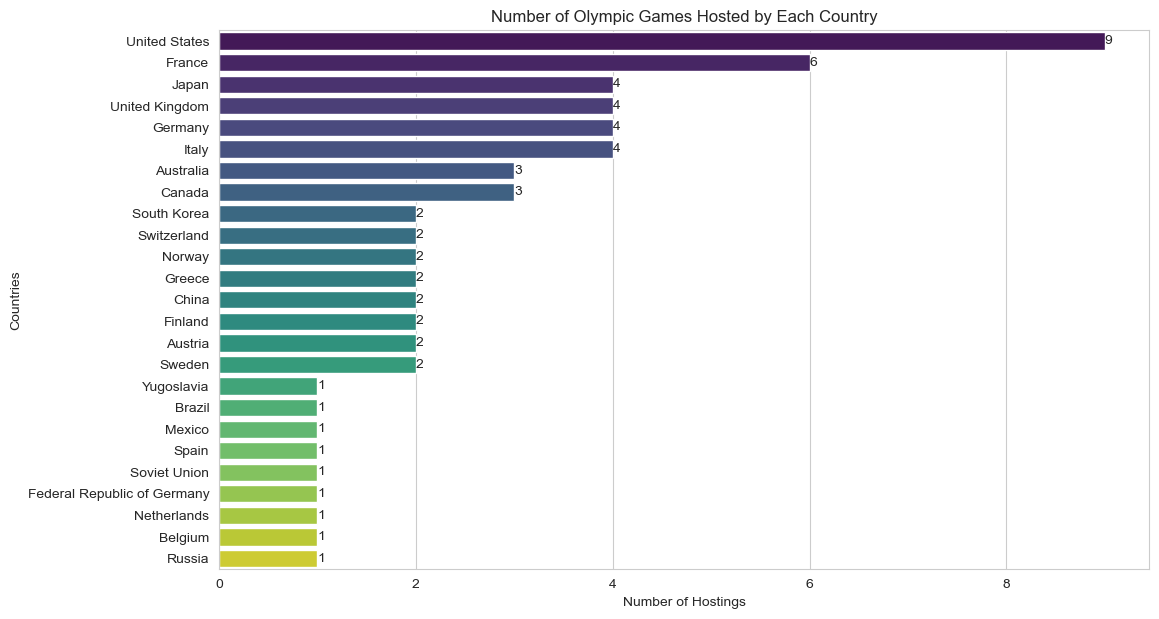

In [137]:
plt.figure(figsize = (12,7))
sns.set_style('whitegrid')
ax = sns.countplot(
    y = 'country', 
    data = places_w_nec_cols, 
    order = host_counts.index, 
    palette = "viridis")
ax.bar_label(ax.containers[0])
# Set the title and axis labels
plt.title("Number of Olympic Games Hosted by Each Country")
plt.ylabel("Countries")
plt.xlabel("Number of Hostings")
plt.savefig('number_of_olympic_games_by_each_country',dpi = 300, bbox_inches = 'tight')
plt.show()

In [138]:
places_w_nec_cols['city'].value_counts()

London                    4
Paris                     3
Los Angeles               3
Athina                    2
Tokyo                     2
Sankt Moritz              2
Cortina d'Ampezzo         2
Beijing                   2
Innsbruck                 2
Garmisch-Partenkirchen    2
Lake Placid               2
Helsinki                  2
Berlin                    2
Stockholm                 2
Nagano                    1
Salt Lake City            1
Albertville               1
Calgary                   1
Sarajevo                  1
Sapporo                   1
Grenoble                  1
Torino                    1
Squaw Valley              1
Vancouver                 1
Oslo                      1
Sochi                     1
Lillehammer               1
Rio de Janeiro            1
Chamonix                  1
Brisbane                  1
Sydney                    1
Atlanta                   1
Barcelona                 1
Seoul                     1
Moskva                    1
Montréal            